**********DecisionTreeRegressor**********
DecisionTreeRegressor gave lowest MSE at degree=10, MSE=2.7351158058707384e-05
**********LinearRegression**********
LinearRegression gave lowest MSE at degree=5, MSE=0.0012204353254946147
**********RandomForestRegressor**********
RandomForestRegressor gave lowest MSE at degree=2, MSE=1.6561449658698893e-05
Mean squared error: 0.0012204353254946147


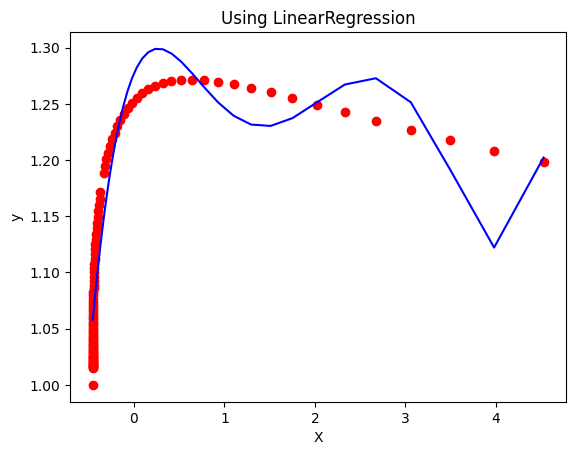

Polynomial regression formula: y =  0.00 * x^0 + 0.19 * x^1 + -0.47 * x^2 + 0.34 * x^3 + -0.10 * x^4 + 0.01 * x^5 + 1.28
Mean squared error: 1.6561449658698893e-05


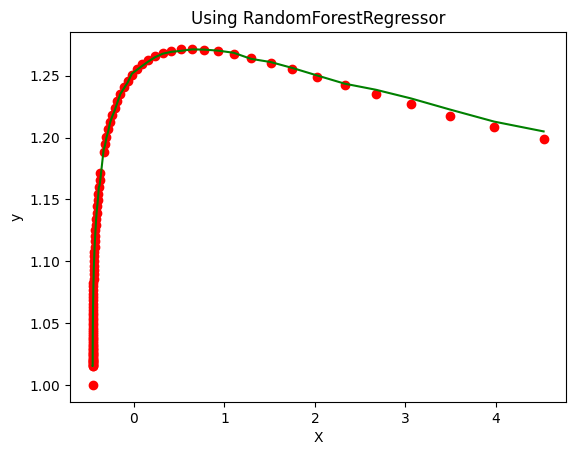

In [23]:
import pandas as pd
import warnings
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tqdm import tqdm

a=np.linspace(1,1,100)
q = np.logspace(-5,0,100)
M=5
def L2():
    M1 = M/(1+q)
    M2 = M*q/(q+1)
    a2 = (1/(1+q))*a
    def gradrocheL2(r2):
        gradient = - M1/((a+r2)**2) - M2/r2**2 + M*(a2+r2)/(a**3)
        return gradient
    L2_2 = optimize.newton(gradrocheL2,a/2)
    L2 = L2_2 + a2
    return L2
    
L2_a = L2()/a   

#################
X = q
y = L2_a

X1 = [0]
y1 = [1]
for i,j in zip(list(X),list(y)):
    if j>=1:
        X1.append(i)
        y1.append(j)
        

X = np.array(X1).reshape(-1, 1)
y = np.array(y1).reshape(-1, 1)

scale = StandardScaler()
X = scale.fit_transform(X)

######## check for optimal polynomical degree ###########
for model in [DecisionTreeRegressor(random_state=42),LinearRegression(),RandomForestRegressor(random_state=42)]:
    name = model.__class__.__name__
    mse_error = []
    print(f'**********{name}**********')
    for i in range(0,15):
        poly_reg = PolynomialFeatures(degree = i)
        X_poly = poly_reg.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)

        lin_reg = model
        lin_reg.fit(X_train, y_train)
        pred = lin_reg.predict(X_test)
        mse = mean_squared_error(y_test,pred)
        mse_error.append(mse)
    deg = np.array(mse_error).argmin()
    print(f"{name} gave lowest MSE at degree={deg}, MSE={mse_error[deg]}")
    
########### degree 5 is having lowest MSE for LinearRegression ############
# Build the model
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)

# split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test,pred)
print('Mean squared error:',mse)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X_poly), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Using LinearRegression')
plt.show()

# Extract coefficients
coefficients = lin_reg.coef_

# Construct polynomial regression formula
formula = 'y = '
for i, coef in enumerate(coefficients[0]):
    formula += f' {coef:.2f} * x^{i} +'
    
formula += f' {lin_reg.intercept_[0]:.2f}'

print("Polynomial regression formula:", formula)



########### degree 2 is having lowest MSE for RandomForestRegressor ############
# Build the model
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

# split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)

lin_reg = RandomForestRegressor(random_state=42)
lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test,pred)
print('Mean squared error:',mse)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X_poly), color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Using RandomForestRegressor')
plt.show()
